In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
pair = 'AUDCHF'
df = pd.read_excel(f'{pair}.xlsx')

In [18]:
# df.columns

In [8]:
# Getting the resultant to plot
df['Resultant P/L'] = df['REAL P/L'].cumsum() + 10000

In [29]:
# df.head()

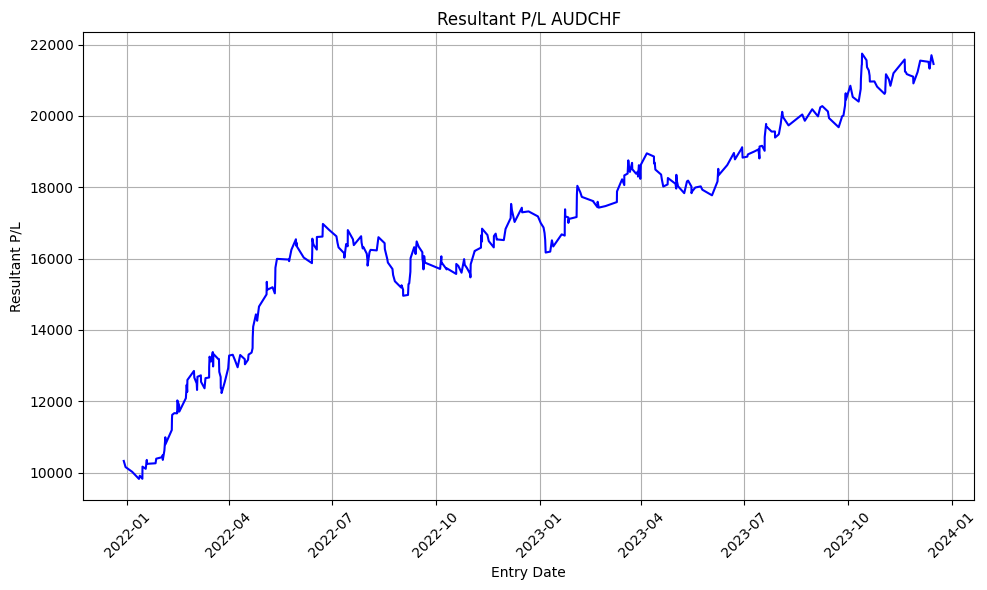

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['ENTRY DATE'], df['Resultant P/L'], linestyle='-', color='b')

# Customize the chart
plt.title(f'Resultant P/L {pair}')
plt.xlabel('Entry Date')
plt.ylabel('Resultant P/L')
plt.grid(True)

# Show the chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Analyze

def calculate_stats(result, account):
    analyse = pd.DataFrame(columns=['TOTAL TRADES', 'WINS', 'LOSSES', 'WIN RATE', 'PERFORMANCE', 'AVG GAIN', 'AVG LOSS', 'WINNING STREAK', 'LOSING STREAK', 'MAX DRAWDOWN'])

    # Calculate the number of total trades, wins, and losses
    total_trades = len(result)
    wins = len(result.loc[result['P/L'] > 0])
    losses = len(result.loc[result['P/L'] < 0])

    analyse.loc[0, 'TOTAL TRADES'] = total_trades
    analyse.loc[0, 'WINS'] = wins
    analyse.loc[0, 'LOSSES'] = losses

    if wins > 0:
        win_rate = round((wins / total_trades) * 100, 2)
        performance = round((result['REAL P/L'].sum() / account) * 100, 2)
        analyse.loc[0, 'WIN RATE'] = f"{win_rate}%"
        analyse.loc[0, 'PERFORMANCE'] = f"{performance}%"
    else:
        analyse.loc[0, 'WIN RATE'] = 0
        performance = round((result['REAL P/L'].sum() / 1000000) * 100, 2)
        analyse.loc[0, 'PERFORMANCE'] = f"{performance}%"

    # Calculate average gain and loss
    if wins > 0 and losses > 0:
        avg_gain = round(result.loc[result['REAL P/L'] > 0]['REAL P/L'].sum() / wins, 2)
        avg_loss = round(result.loc[result['REAL P/L'] < 0]['REAL P/L'].sum() / losses, 2)
        analyse.loc[0, 'AVG GAIN'] = avg_gain
        analyse.loc[0, 'AVG LOSS'] = avg_loss

    # Calculate winning and losing streaks
    positive_counter = 0
    negative_counter = 0
    max_score = 1
    min_score = 1

    for ele in result['P/L']:
        if ele > 0:
            if negative_counter > 0:
                min_score = max(min_score, negative_counter)
            positive_counter += 1
            negative_counter = 0
        elif ele < 0:
            if positive_counter > 0:
                max_score = max(max_score, positive_counter)
            positive_counter = 0
            negative_counter += 1

    analyse.loc[0, 'WINNING STREAK'] = max_score
    analyse.loc[0, 'LOSING STREAK'] = min_score

    analyse.loc[0, 'MAX DRAWDOWN'] = f"{float(2 * min_score)}% [2% Risk/Trade]"

    return analyse


print(calculate_stats(df, 10000))

  TOTAL TRADES WINS LOSSES WIN RATE PERFORMANCE AVG GAIN AVG LOSS  \
0          347  170    176   48.99%     114.56%   225.12  -152.36   

  WINNING STREAK LOSING STREAK           MAX DRAWDOWN  
0              7             9  18.0% [2% Risk/Trade]  
